In [2]:
!pip install music21

  Using cached music21-7.3.3-py3-none-any.whl (22.4 MB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached webcolors-1.12-py3-none-any.whl (9.9 kB)
  Using cached more_itertools-8.13.0-py3-none-any.whl (51 kB)
  Using cached jsonpickle-2.2.0-py2.py3-none-any.whl (39 kB)


In [81]:
from music21 import converter, chord, note

dataset_name = 'cello'
filename = 'cs1-2all'
file = "data/{}/{}.mid".format(dataset_name, filename)

original_score = converter.parse(file).chordify()

FileNotFoundError: Cannot find file in data/cello/cs1-2all.mid

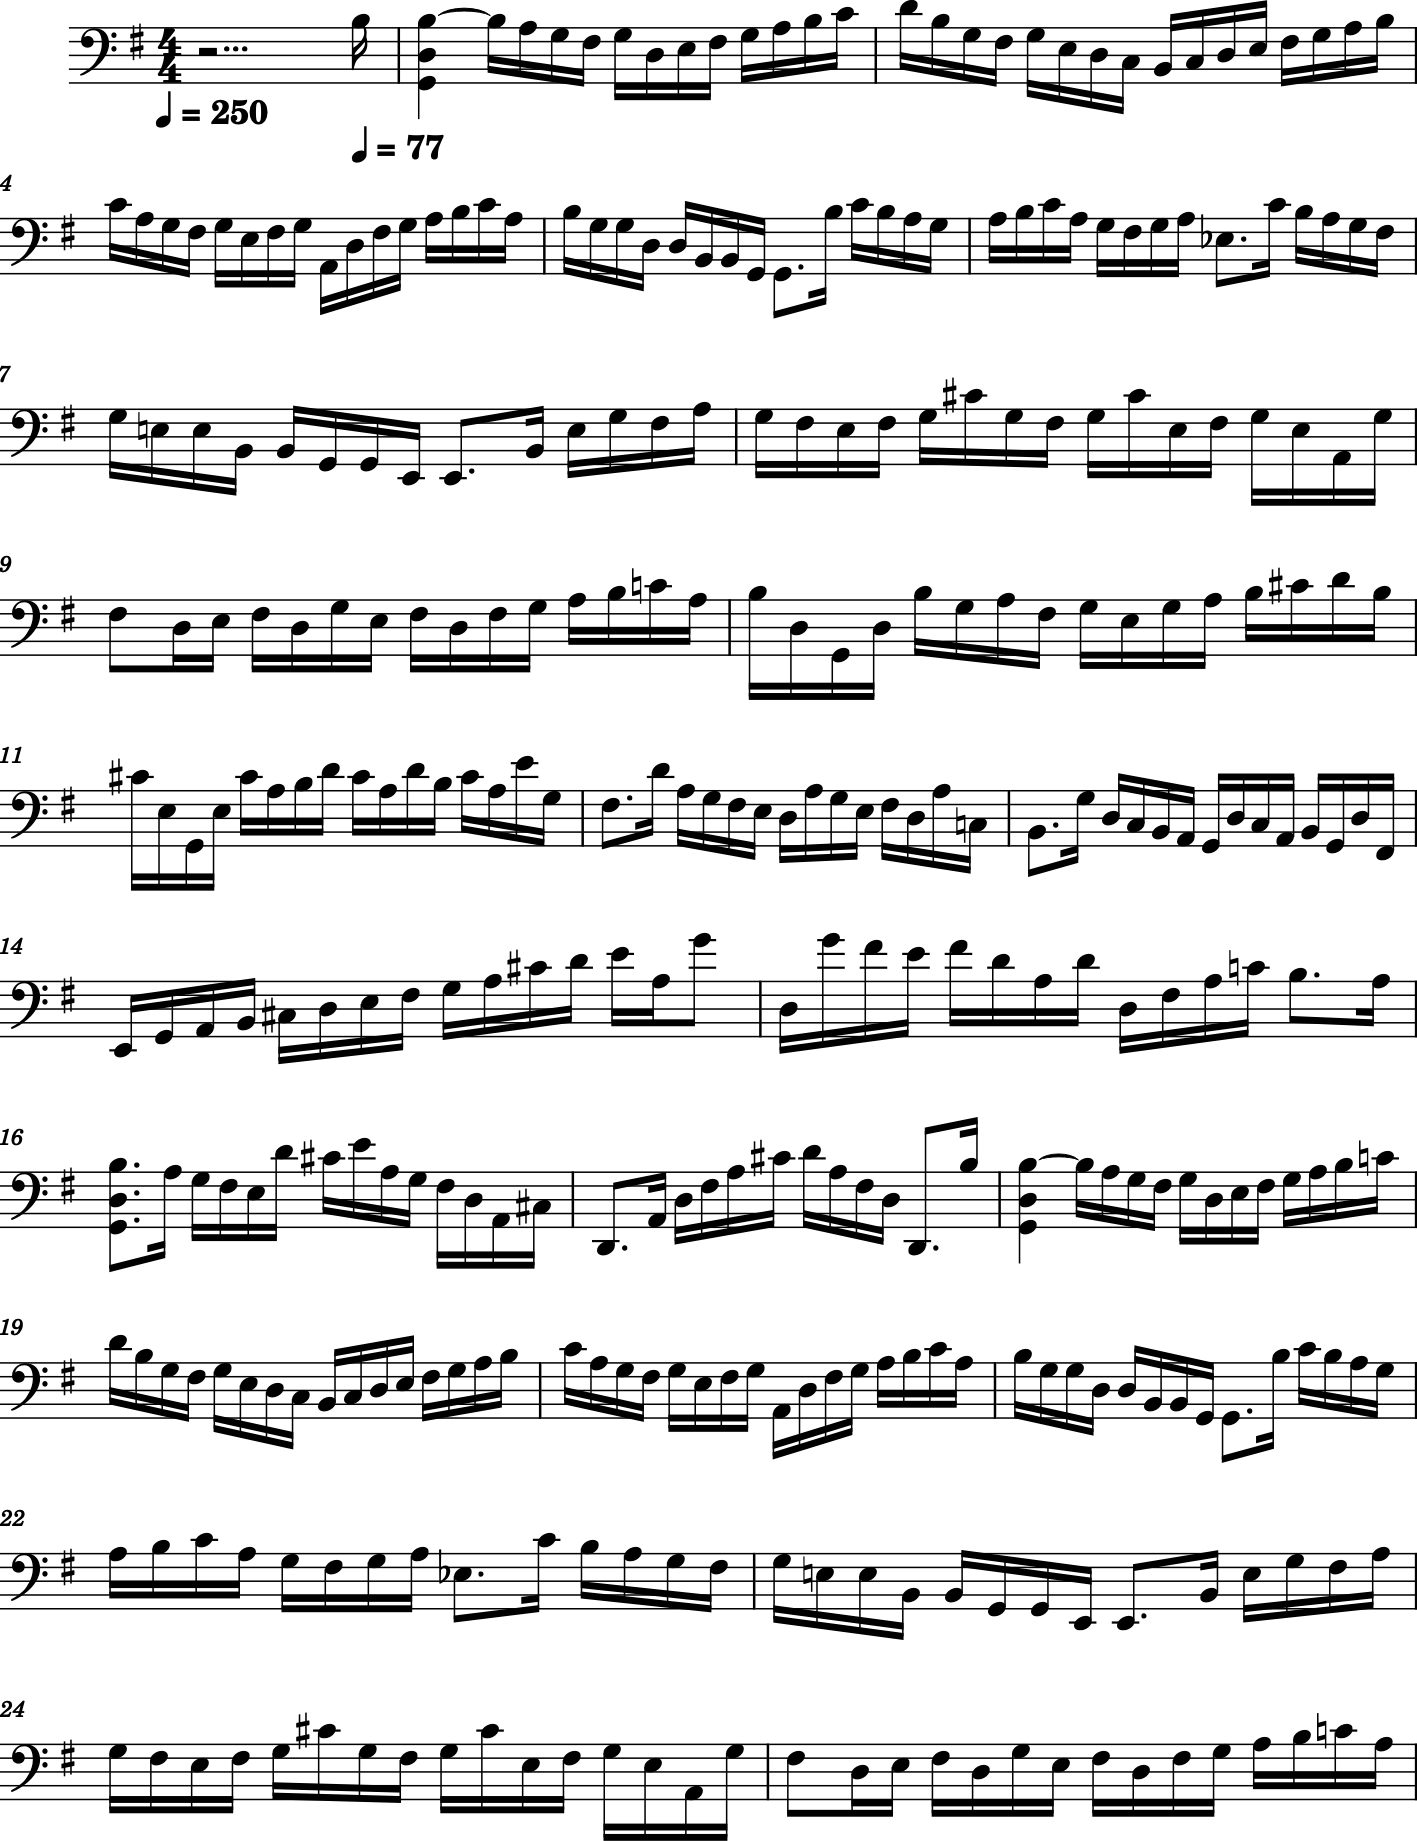

In [35]:
original_score.show()

In [36]:
original_score.show('text')

{0.0} <music21.stream.Measure 1 offset=0.0>
    {0.0} <music21.instrument.Violoncello 'Solo Cello: Solo Cello'>
    {0.0} <music21.instrument.Violoncello 'Violoncello'>
    {0.0} <music21.clef.BassClef>
    {0.0} <music21.tempo.MetronomeMark Quarter=250.0>
    {0.0} <music21.key.Key of G major>
    {0.0} <music21.meter.TimeSignature 4/4>
    {0.0} <music21.note.Rest 3.75ql>
    {3.5} <music21.tempo.MetronomeMark Quarter=77.0>
    {3.75} <music21.chord.Chord B3>
{4.0} <music21.stream.Measure 2 offset=4.0>
    {0.0} <music21.chord.Chord G2 D3 B3>
    {1.0} <music21.chord.Chord B3>
    {1.25} <music21.chord.Chord A3>
    {1.5} <music21.chord.Chord G3>
    {1.75} <music21.chord.Chord F#3>
    {2.0} <music21.chord.Chord G3>
    {2.25} <music21.chord.Chord D3>
    {2.5} <music21.chord.Chord E3>
    {2.75} <music21.chord.Chord F#3>
    {3.0} <music21.chord.Chord G3>
    {3.25} <music21.chord.Chord A3>
    {3.5} <music21.chord.Chord B3>
    {3.75} <music21.chord.Chord C4>
{8.0} <music21.stream

In [62]:
notes = []
durations = []

for element in original_score.flat:
    if isinstance(element, chord.Chord):
        notes.append('.'.join(n.nameWithOctave for n in element.pitches))
        durations.append(element.duration.quarterLength)
    
    if isinstance(element, note.Note):
        if element.isRest:
            print("#" * 100)
            notes.append(str(element.name))
            durations.append(element.duration.quarterLength)
        else:
            print("#" * 100)
            notes.append(str(element.nameWithOctave))
            durations.append(element.duration.quarterLength)

In [63]:
print('\nduration', 'pitch')
for n,d in zip(notes, durations):
    print(d, '\t', n)


duration pitch
0.25 	 B3
1.0 	 G2.D3.B3
0.25 	 B3
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 D3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 D4
0.25 	 B3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 E3
0.25 	 D3
0.25 	 C3
0.25 	 B2
0.25 	 C3
0.25 	 D3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 A2
0.25 	 D3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 A3
0.25 	 B3
0.25 	 G3
0.25 	 G3
0.25 	 D3
0.25 	 D3
0.25 	 B2
0.25 	 B2
0.25 	 G2
0.75 	 G2
0.25 	 B3
0.25 	 C4
0.25 	 B3
0.25 	 A3
0.25 	 G3
0.25 	 A3
0.25 	 B3
0.25 	 C4
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 A3
0.75 	 E-3
0.25 	 C4
0.25 	 B3
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 G3
0.25 	 E3
0.25 	 E3
0.25 	 B2
0.25 	 B2
0.25 	 G2
0.25 	 G2
0.25 	 E2
0.75 	 E2
0.25 	 B2
0.25 	 E3
0.25 	 G3
0.25 	 F#3
0.25 	 A3
0.25 	 G3
0.25 	 F#3
0.25 	 E3
0.25 	 F#3
0.25 	 G3
0.25 	 C#4
0.25 	 G3
0.25 	 F#3
0.25

In [1]:
import os
import pickle
import numpy
from music21 import note, chord

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import plot_model

from models.RNNAttention import get_distinct, create_lookups, prepare_sequences, get_music_list, create_network


## Set Parameters

In [14]:
# run params
section = 'compose'
run_id = '0006'
music_name = 'cello'

run_folder = 'run/{}/'.format(section)
run_folder += '_'.join([run_id, music_name])


store_folder = os.path.join(run_folder, 'store')
data_folder = os.path.join('data', music_name)

if not os.path.exists(run_folder):
    os.mkdir(run_folder)
    os.mkdir(os.path.join(run_folder, 'store'))
    os.mkdir(os.path.join(run_folder, 'output'))
    os.mkdir(os.path.join(run_folder, 'weights'))
    os.mkdir(os.path.join(run_folder, 'viz'))
    


mode = 'load' # 'load' # 

# data params
intervals = range(1)
seq_len = 32

# model params
embed_size = 100
rnn_units = 256
use_attention = True

## Extract the notes

In [15]:
if mode == 'build':
    
    music_list, parser = get_music_list(data_folder)
    print(len(music_list), 'files in total')

    notes = []
    durations = []

    for i, file in enumerate(music_list):
        print(i+1, "Parsing %s" % file)
        original_score = parser.parse(file).chordify()
        

        for interval in intervals:

            score = original_score.transpose(interval)

            notes.extend(['START'] * seq_len)
            durations.extend([0]* seq_len)

            for element in score.flat:
                
                if isinstance(element, note.Note):
                    if element.isRest:
                        notes.append(str(element.name))
                        durations.append(element.duration.quarterLength)
                    else:
                        notes.append(str(element.nameWithOctave))
                        durations.append(element.duration.quarterLength)

                if isinstance(element, chord.Chord):
                    notes.append('.'.join(n.nameWithOctave for n in element.pitches))
                    durations.append(element.duration.quarterLength)

    with open(os.path.join(store_folder, 'notes'), 'wb') as f:
        pickle.dump(notes, f) #['G2', 'D3', 'B3', 'A3', 'B3', 'D3', 'B3', 'D3', 'G2',...]
    with open(os.path.join(store_folder, 'durations'), 'wb') as f:
        pickle.dump(durations, f) 
else:
    with open(os.path.join(store_folder, 'notes'), 'rb') as f:
        notes = pickle.load(f) #['G2', 'D3', 'B3', 'A3', 'B3', 'D3', 'B3', 'D3', 'G2',...]
    with open(os.path.join(store_folder, 'durations'), 'rb') as f:
        durations = pickle.load(f) 

In [16]:
# get the distinct sets of notes and durations
note_names, n_notes = get_distinct(notes)
duration_names, n_durations = get_distinct(durations)
distincts = [note_names, n_notes, duration_names, n_durations]

with open(os.path.join(store_folder, 'distincts'), 'wb') as f:
    pickle.dump(distincts, f)

# make the lookup dictionaries for notes and dictionaries and save
note_to_int, int_to_note = create_lookups(note_names)
duration_to_int, int_to_duration = create_lookups(duration_names)
lookups = [note_to_int, int_to_note, duration_to_int, int_to_duration]

with open(os.path.join(store_folder, 'lookups'), 'wb') as f:
    pickle.dump(lookups, f)

In [17]:
print('\nnote_to_int')
note_to_int


note_to_int


{'A2': 0,
 'A2.A3': 1,
 'A2.B-3': 2,
 'A2.B2': 3,
 'A2.C3': 4,
 'A2.D3': 5,
 'A2.E-3': 6,
 'A2.E3': 7,
 'A2.E3.A3': 8,
 'A2.E3.C#4': 9,
 'A2.E3.C#4.A4': 10,
 'A2.E3.C#4.E4': 11,
 'A2.E3.C#4.G#4': 12,
 'A2.E3.C4': 13,
 'A2.E3.D4': 14,
 'A2.F#3': 15,
 'A2.F#3.C4': 16,
 'A2.F#3.D4': 17,
 'A2.F#3.D4.A4': 18,
 'A2.F#3.D4.E4': 19,
 'A2.F#3.D4.F#4': 20,
 'A2.F#4': 21,
 'A2.F3': 22,
 'A2.F3.C4': 23,
 'A2.F3.D4': 24,
 'A2.F3.D4.A4': 25,
 'A2.G3': 26,
 'A2.G3.C#4': 27,
 'A2.G3.D4': 28,
 'A3': 29,
 'A3.B-3': 30,
 'A3.B3': 31,
 'A3.B3.C#4': 32,
 'A3.B3.C#4.D4': 33,
 'A3.B3.C4': 34,
 'A3.C#4': 35,
 'A3.C#4.E4': 36,
 'A3.C4': 37,
 'A3.D4': 38,
 'A3.E4': 39,
 'A3.E4.F#4': 40,
 'A3.E4.G4': 41,
 'A3.F#4': 42,
 'A3.F#4.G4': 43,
 'A3.F4': 44,
 'A3.G4': 45,
 'A4': 46,
 'A4.B4': 47,
 'B-2': 48,
 'B-2.A3': 49,
 'B-2.B-3': 50,
 'B-2.C3': 51,
 'B-2.D3': 52,
 'B-2.D3.A3': 53,
 'B-2.D3.E-3.G#3': 54,
 'B-2.D3.G#3': 55,
 'B-2.E-3': 56,
 'B-2.E3': 57,
 'B-2.E3.D4': 58,
 'B-2.F#3.C#4.E4': 59,
 'B-2.F3': 60,
 'B-2.F

In [18]:
network_input, network_output = prepare_sequences(notes, durations, lookups, distincts, seq_len)

In [19]:
print('pitch input')
print(network_input[0][0])
print('duration input')
print(network_input[1][0])
print('pitch output')
print(network_output[0][0])
print('duration output')
print(network_output[1][0])

pitch input
[469 469 469 469 469 469 469 469 469 469 469 469 469 469 469 469 469 469
 469 469 469 469 469 469 469 469 469 469 469 469 469 469]
duration input
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
pitch output
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [20]:
model, att_model = create_network(n_notes, n_durations, embed_size, rnn_units, use_attention)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, None, 100)    47000       ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, None, 100)    1700        ['input_4[0][0]']                
                                                                                            

In [21]:
plot_model(model, to_file=os.path.join(run_folder ,'viz/model.png'), show_shapes = True, show_layer_names = True)


You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [11]:
!pip install pydot

In [22]:
weights_folder = os.path.join(run_folder, 'weights')
model.load_weights(os.path.join(weights_folder, "weights.h5"))

In [23]:
weights_folder = os.path.join(run_folder, 'weights')

checkpoint1 = ModelCheckpoint(
    os.path.join(weights_folder, "weights-improvement-{epoch:02d}-{loss:.4f}-bigger.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

checkpoint2 = ModelCheckpoint(
    os.path.join(weights_folder, "weights.h5"),
    monitor='loss',
    verbose=0,
    save_best_only=True,
    mode='min'
)

early_stopping = EarlyStopping(
    monitor='loss'
    , restore_best_weights=True
    , patience = 10
)


callbacks_list = [
    checkpoint1
    , checkpoint2
    , early_stopping
 ]

model.save_weights(os.path.join(weights_folder, "weights.h5"))
model.fit(network_input, network_output
          , epochs=2000000, batch_size=32
          , validation_split = 0.2
          , callbacks=callbacks_list
          , shuffle=True
         )

Epoch 1/2000000
714/714 [==============================] - 79s 107ms/step - loss: 0.2270 - pitch_loss: 0.2018 - duration_loss: 0.0252 - val_loss: 7.8129 - val_pitch_loss: 6.4360 - val_duration_loss: 1.3770
Epoch 2/2000000
714/714 [==============================] - 68s 95ms/step - loss: 0.2214 - pitch_loss: 0.1953 - duration_loss: 0.0261 - val_loss: 7.7929 - val_pitch_loss: 6.3729 - val_duration_loss: 1.4200
Epoch 3/2000000
714/714 [==============================] - 69s 97ms/step - loss: 0.2257 - pitch_loss: 0.1984 - duration_loss: 0.0273 - val_loss: 7.7704 - val_pitch_loss: 6.4123 - val_duration_loss: 1.3581
Epoch 4/2000000
714/714 [==============================] - 82s 114ms/step - loss: 0.2219 - pitch_loss: 0.1963 - duration_loss: 0.0255 - val_loss: 7.8376 - val_pitch_loss: 6.4976 - val_duration_loss: 1.3400
Epoch 5/2000000
714/714 [==============================] - 94s 131ms/step - loss: 0.2180 - pitch_loss: 0.1905 - duration_loss: 0.0274 - val_loss: 7.7996 - val_pitch_loss: 6.4255 

Epoch 41/2000000
714/714 [==============================] - 74s 104ms/step - loss: 0.2045 - pitch_loss: 0.1753 - duration_loss: 0.0292 - val_loss: 8.1753 - val_pitch_loss: 6.7399 - val_duration_loss: 1.4354
Epoch 42/2000000
714/714 [==============================] - 76s 106ms/step - loss: 0.2059 - pitch_loss: 0.1761 - duration_loss: 0.0298 - val_loss: 8.1927 - val_pitch_loss: 6.7515 - val_duration_loss: 1.4412
Epoch 43/2000000
714/714 [==============================] - 76s 106ms/step - loss: 0.2031 - pitch_loss: 0.1738 - duration_loss: 0.0293 - val_loss: 8.2630 - val_pitch_loss: 6.8849 - val_duration_loss: 1.3781
Epoch 44/2000000
714/714 [==============================] - 76s 107ms/step - loss: 0.2091 - pitch_loss: 0.1795 - duration_loss: 0.0297 - val_loss: 8.1308 - val_pitch_loss: 6.7671 - val_duration_loss: 1.3638
Epoch 45/2000000
714/714 [==============================] - 77s 107ms/step - loss: 0.2028 - pitch_loss: 0.1753 - duration_loss: 0.0275 - val_loss: 8.0745 - val_pitch_loss: 